In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

C:\Users\mikex\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [11]:
tickers = ['^GSPC','^IXIC','^GDAXI']
ind_data = pd.DataFrame()
start_date = '2016-1-1'
for t in tickers:
    ind_data[t] = wb.DataReader(t,data_source='yahoo', start=start_date)['Adj Close']

In [12]:
ind_data.head()

,^GSPC,^IXIC,^GDAXI
Date,,,
2015-12-31,2043.939941,5007.410156,NaN
2016-01-04,2012.660034,4903.089844,10283.440430
2016-01-05,2016.709961,4891.430176,10310.099609
2016-01-06,1990.260010,4835.759766,10214.019531
2016-01-07,1943.089966,4689.430176,9979.849609


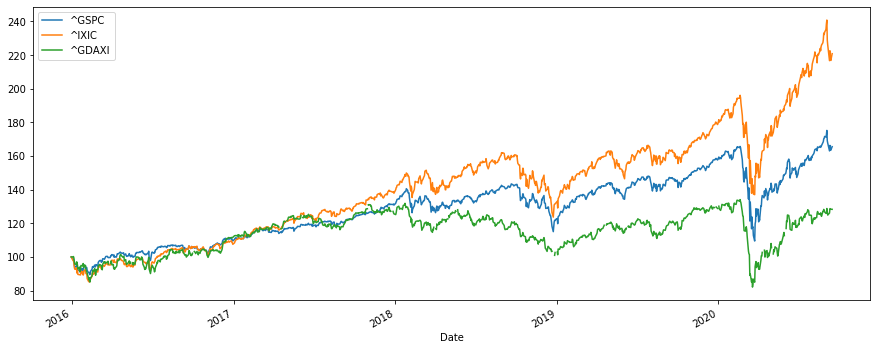

In [13]:
ind_data['^GDAXI'][0]=10283.440430
(ind_data/ind_data.iloc[0]*100).plot(figsize=(15,6))
plt.show()

In [14]:
ind_returns = (ind_data/ind_data.shift(1))-1
ind_returns.head()

,^GSPC,^IXIC,^GDAXI
Date,,,
2015-12-31,NaN,NaN,NaN
2016-01-04,-0.015304,-0.020833,-3.038869e-11
2016-01-05,0.002012,-0.002378,2.592438e-03
2016-01-06,-0.013115,-0.011381,-9.319025e-03
2016-01-07,-0.023700,-0.030260,-2.292632e-02


In [15]:
annual_ind_returns = ind_returns.mean()*250
annual_ind_returns

^GSPC     0.125297
^IXIC     0.190381
^GDAXI    0.065133
dtype: float64

Comparing returns

In [16]:
tickers = ['^GSPC','^DJI','TSLA']
data_2 = pd.DataFrame()
start_date = '2016-1-1'
for t in tickers:
    data_2[t] = wb.DataReader(t,data_source='yahoo', start=start_date)['Adj Close']

In [17]:
data_2.head()

,^GSPC,^DJI,TSLA
Date,,,
2015-12-31,2043.939941,17425.029297,48.001999
2016-01-04,2012.660034,17148.939453,44.681999
2016-01-05,2016.709961,17158.660156,44.686001
2016-01-06,1990.260010,16906.509766,43.807999
2016-01-07,1943.089966,16514.099609,43.130001


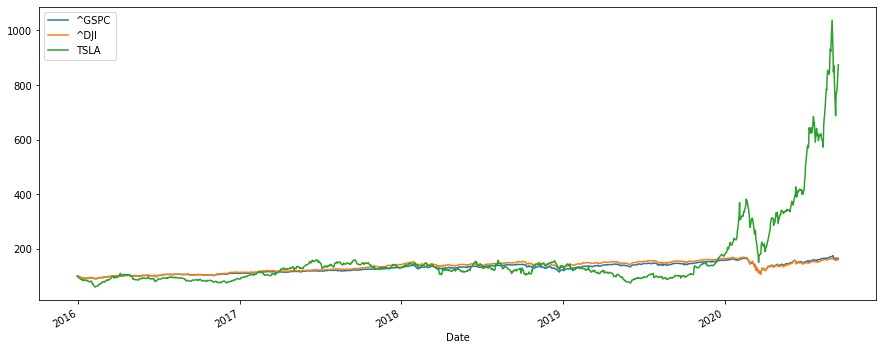

In [18]:
(data_2/data_2.iloc[0]*100).plot(figsize=(15,6))
plt.show()